# VGG:

### Import the required packages:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

### Load the dataset:

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

### Add padding to the images:

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

### Expand the dimensions of the images:

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

### Repeating the elements:

In [5]:
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

### Splitting data for the validation set:

In [6]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

### Creating the model:

In [7]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet',
                                             include_top = False,
                                             input_shape = (32,32,3))
for layer in base_model.layers:
    layer.trainable = False
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)

In [8]:
head_model.compile(optimizer='adam', metrics=['accuracy'],
 loss=losses.sparse_categorical_crossentropy)

### Training the model:

In [9]:
history = head_model.fit(x_train, y_train,
batch_size=64,
epochs=10,
validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 397s 435ms/step - loss: 0.3245 - accuracy: 0.9002 - val_loss: 0.1168 - val_accuracy: 0.9620
Epoch 2/10
907/907 [==============================] - 416s 459ms/step - loss: 0.1583 - accuracy: 0.9488 - val_loss: 0.0898 - val_accuracy: 0.9735
Epoch 3/10
907/907 [==============================] - 1450s 2s/step - loss: 0.1340 - accuracy: 0.9557 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 4/10
907/907 [==============================] - 568s 627ms/step - loss: 0.1183 - accuracy: 0.9615 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 5/10
907/907 [==============================] - 492s 543ms/step - loss: 0.1080 - accuracy: 0.9637 - val_loss: 0.0673 - val_accuracy: 0.9805
Epoch 6/10
907/907 [==============================] - 407s 449ms/step - loss: 0.0992 - accuracy: 0.9665 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 7/10
907/907 [==============================] - 540s 595ms/step - loss: 0.0936 - accuracy: 0.9688 - val_loss: 0.0730 - v

### Plotting accuracy and losses:

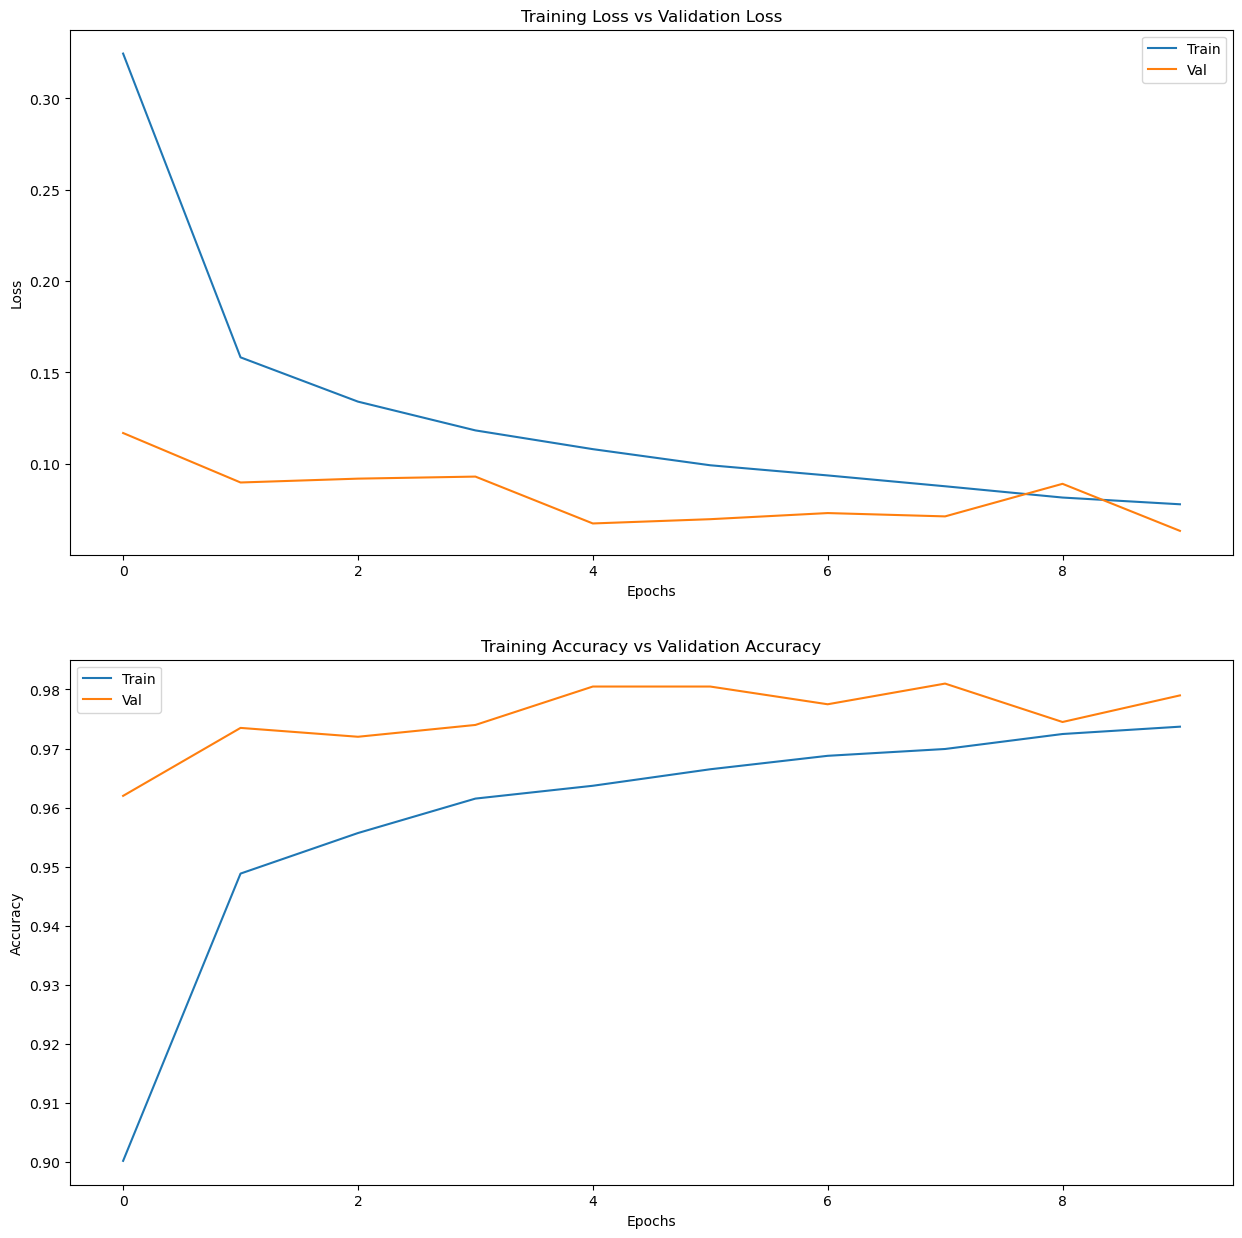

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

### Printing the metrics:

In [11]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 42s 134ms/step - loss: 0.0815 - accuracy: 0.9738


[0.08152825385332108, 0.973800003528595]